# Assigment Python 1
#### Data Set : London Crime Data
#### Sumber Data set : https://www.kaggle.com/datasets/jboysen/london-crime

### Penjelasan Data Set  

Kejahatan di wilayah metropolitan besar, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori besar/kecil dari Jan 2008-Des 2016.

Column yang ada pada data set<br>

lsoa_code: kode untuk Area Output Super Bawah di London Raya.<br>
borough: Nama umum untuk wilayah London.<br>
major_category: Kategorisasi kejahatan tingkat tinggi.<br>
minor_category: Kategorisasi kejahatan tingkat rendah.<br>
value: jumlah kejahatan kategorikal yang dilaporkan setiap bulan di wilayah tertentu<br>
year: Tahun penghitungan yang dilaporkan, 2008-2016<br>
month: Bulan penghitungan yang dilaporkan, 1-12<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium

### Membaca dataset

In [3]:
df = pd.read_csv('D:\Kuliah\Semester 7\Hacktiv8\Dataset\london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Data Preprocessing & Data Cleanning

Menampilkan jumlah baris dan kolom

In [4]:
df.shape

(13490604, 7)

Menampilkan ada kolom apa saja pada dataset

In [5]:
df.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

Mengecek missing value

In [6]:
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

Mengecek statistik deskriptif data dalam Dataset

In [7]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Mengecek missing value

In [8]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Mengecek data duplikat atau double

In [9]:
df.duplicated().sum()

0

Mengecek tipe data setiap kolom

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Mengecek ada value apa saja dan ada berapa 

In [75]:
df['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

Menampilkan total kejahatan terbesar di setiap tahun dalam bentuk tabel

In [12]:
crime = df.pivot_table(index='year', columns='major_category', values='value', aggfunc=np.sum, fill_value=0)
crime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Melakukan transpose pada variabel crime untuk merubah baris menjadi kolom

In [13]:
major_crime = crime.transpose()
major_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


Menambahkan colom Total Crime yang menjumlahkan total major category pada setiap tahun

In [14]:
crime['Total Crime'] = crime.sum(axis=1, numeric_only=True)
crime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total Crime
year,,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844,738641
2009,90619,85565,60549,0,10644,29568,0,279492,160777,717214
2010,86826,77897,58674,0,10768,32341,0,290924,157894,715324
2011,93315,70914,57550,0,10264,36679,0,309292,146901,724915
2012,93392,62158,51776,0,10675,35260,0,334054,150014,737329
2013,87222,56206,50278,0,10811,29337,0,306372,146181,686407
2014,76053,59279,44435,0,13037,22150,0,279880,185349,680183
2015,70489,62976,39785,0,14229,21383,0,284022,218740,711624
2016,68285,64071,38914,0,15809,22528,0,294133,232381,736121


Menambahkan kolom total yang menjumlahkan total kasus pada setiap kategori dari tahun 2008 sampai 2016

In [15]:
major_crime['Total'] = major_crime.sum(axis=1, numeric_only=True)
major_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


Nama kolom yang kebanyakannya bilangan bulat seperti tahun yang akan menimbulkan ketika kita akan mengambil pada tahun 2016 orang munugkin akan bingung ketika akan memanggil dan tidak mengetahui indeks posisi 2016.

Untuk mengatasi kebingungan tersebut di ubah menjadi string '2008' sampai '2016'

In [79]:
major_crime.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Total'],
      dtype='object')

In [80]:
major_crime.columns = list(map(str, major_crime.columns))

Dengan diubahnya atau dikonversinya tahun menjadi string, maka di deklarasikan variabel years

In [81]:
years = list(map(str, range(2008, 2017)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [19]:
major_crime.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Total'],
      dtype='object')

Menampilkan total kasus yang terjadi di wilayah yang ada di london setiap tahun

In [20]:
borough = df.pivot_table(index='year', columns='borough', values='value', aggfunc=np.sum, fill_value=0)
borough

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [21]:
crime_borough = borough.transpose()
crime_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [22]:
crime_borough['Total Crime in Borough'] = crime_borough.sum(axis=1, numeric_only=True)
crime_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Crime in Borough
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [23]:
crime_borough.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       'Total Crime in Borough'],
      dtype='object', name='year')

In [24]:
crime_borough.columns = list(map(str, crime_borough.columns))

In [25]:
tahun = list(map(str, range(2008, 2017)))
tahun

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [26]:
crime_borough.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Total Crime in Borough'],
      dtype='object')

## Visualisasi Data


In [27]:
total_crime = crime['Total Crime']
total_crime

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: Total Crime, dtype: int64

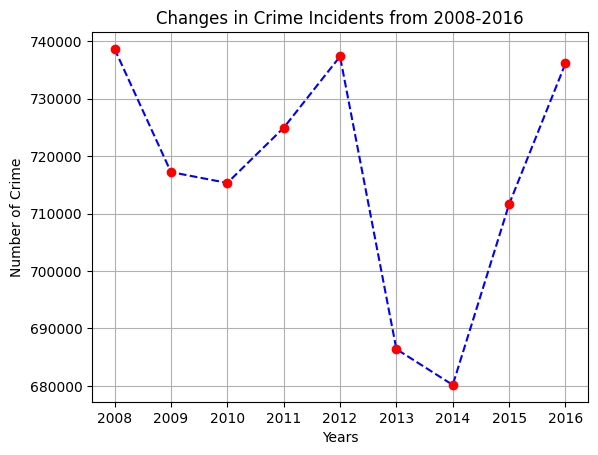

In [28]:
plt.plot(total_crime, "b--", total_crime, "ro")
plt.grid(True)

plt.title('Changes in Crime Incidents from 2008-2016')
plt.ylabel('Number of Crime')
plt.xlabel('Years')

plt.show()

## Area Plot

In [29]:
major_crime.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# untuk mendapatkan 5 kategori teratas
top5_crime = major_crime.head()

# transpose data
top5_crime = top5_crime[years].transpose()

top5_crime

major_category,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs
2008,283692,159844,88092,91872,68804
2009,279492,160777,90619,85565,60549
2010,290924,157894,86826,77897,58674
2011,309292,146901,93315,70914,57550
2012,334054,150014,93392,62158,51776
2013,306372,146181,87222,56206,50278
2014,279880,185349,76053,59279,44435
2015,284022,218740,70489,62976,39785
2016,294133,232381,68285,64071,38914


In [30]:
top5_crime.index = top5_crime.index.map(int)

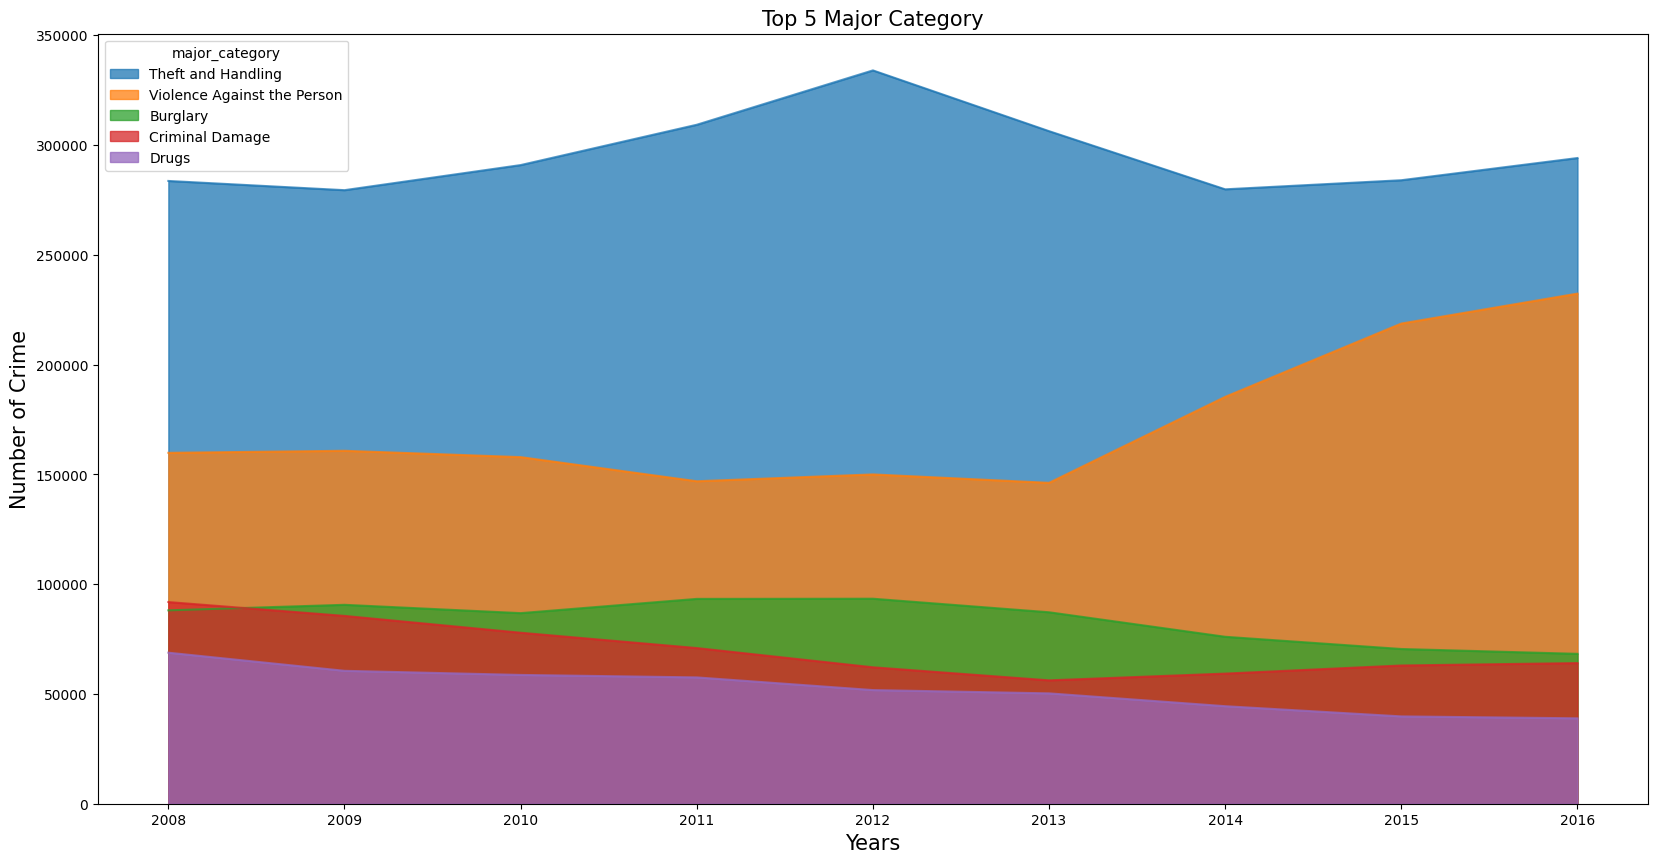

In [31]:
top5_crime.plot(kind='area',
                alpha=0.75,
                stacked=False,
                figsize=(20,10), # pass a tuple (x,y) size
                )

plt.title('Top 5 Major Category', fontsize=15)
plt.ylabel('Number of Crime', fontsize=15)
plt.xlabel('Years', fontsize=15)

plt.show()

In [32]:
crime_borough.sort_values(by='Total Crime in Borough', ascending=False, axis=0, inplace=True)

# untuk mendapatkan 5 kategori terendah
lowest5_borough = crime_borough.tail()

# transpose data
lowest5_borough = lowest5_borough[years].transpose()

lowest5_borough

borough,Bexley,Sutton,Richmond upon Thames,Kingston upon Thames,City of London
2008,15305,12943,11106,10661,0
2009,14445,12240,10618,10163,0
2010,13166,12032,10601,10171,0
2011,11325,11068,10896,10155,69
2012,11669,10948,11168,9956,157
2013,11552,10057,10439,9191,110
2014,11844,10443,10456,9288,115
2015,11990,10598,10413,9738,151
2016,12840,10658,11074,9983,178


In [33]:
lowest5_borough.index = lowest5_borough.index.map(int)

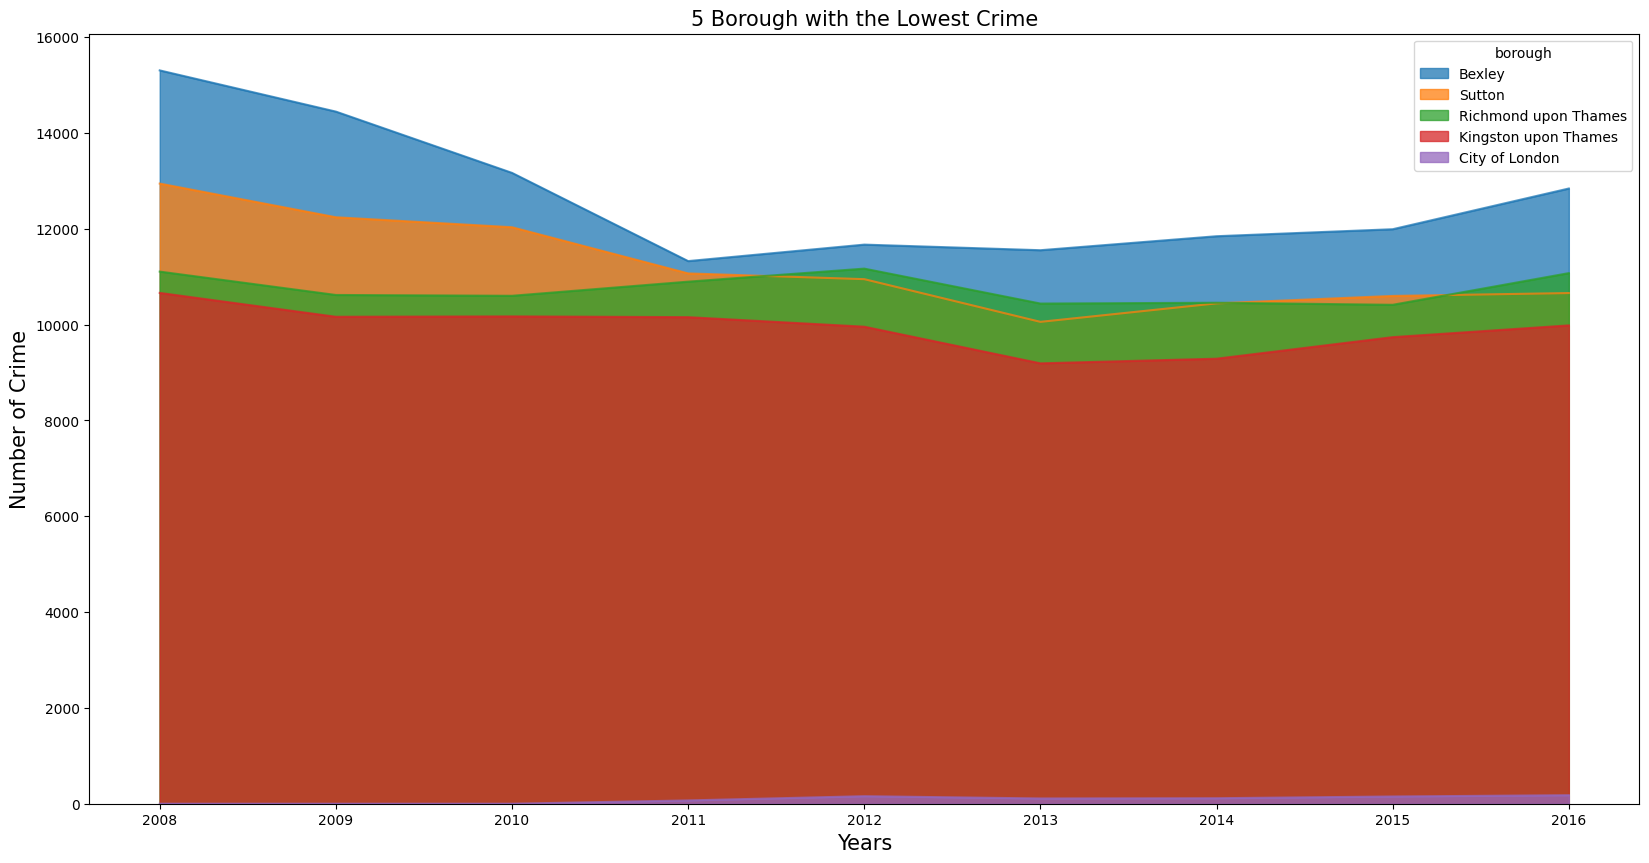

In [34]:
lowest5_borough.plot(kind='area',
                alpha=0.75,
                stacked=False,
                figsize=(20,10), # pass a tuple (x,y) size
                )

plt.title('5 Borough with the Lowest Crime', fontsize=15)
plt.ylabel('Number of Crime', fontsize=15)
plt.xlabel('Years', fontsize=15)

plt.show()

### Histogram

In [35]:
major_crime['2016'].head()

major_category
Theft and Handling             294133
Violence Against the Person    232381
Burglary                        68285
Criminal Damage                 64071
Drugs                           38914
Name: 2016, dtype: int64

In [36]:
# np.histograms mengeluarkan 2 nilai
count, bin_edges = np.histogram(major_crime['2016'])

# print jumlah frekuensi
print(count)
# bin ranges, default = 10 bins
print(bin_edges) 

[4 1 2 0 0 0 0 1 0 1]
[     0.   29413.3  58826.6  88239.9 117653.2 147066.5 176479.8 205893.1
 235306.4 264719.7 294133. ]


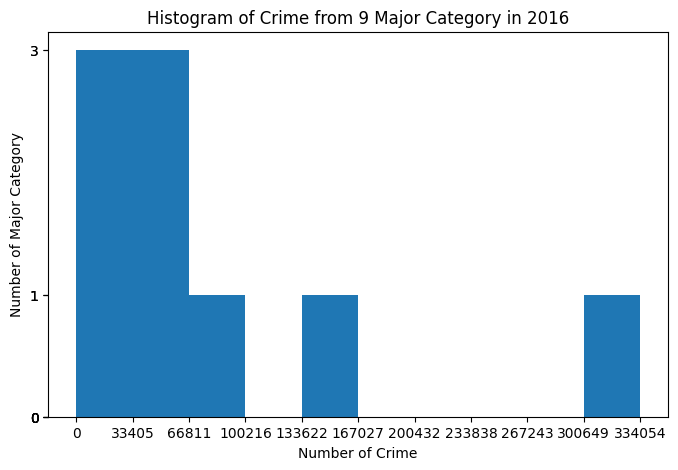

In [37]:
count, bin_edges = np.histogram(major_crime['2012'])

major_crime['2012'].plot(kind='hist', figsize=(8,5), xticks=bin_edges, yticks=count)

plt.title('Histogram of Crime from 9 Major Category in 2016')
plt.ylabel('Number of Major Category')
plt.xlabel('Number of Crime')

plt.show()

In [38]:
crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun]

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Greenwich,22010,19851,18626,18552,20028,18948,19894,20929,22730
Redbridge,20873,20837,20652,21994,21424,19793,19590,18897,19502
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693


In [39]:
df_grb = crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun].T
df_grb

borough,Greenwich,Redbridge,Brent
2008,22010,20873,23504
2009,19851,20837,24748
2010,18626,20652,25512
2011,18552,21994,27669
2012,20028,21424,26357
2013,18948,19793,23759
2014,19894,19590,24426
2015,20929,18897,24883
2016,22730,19502,26693


In [40]:
count, bin_edges = np.histogram(df_grb, 15)
print(count)
print(bin_edges)

[4 2 4 4 1 2 1 0 2 1 2 1 1 1 1]
[18552.  19159.8 19767.6 20375.4 20983.2 21591.  22198.8 22806.6 23414.4
 24022.2 24630.  25237.8 25845.6 26453.4 27061.2 27669. ]


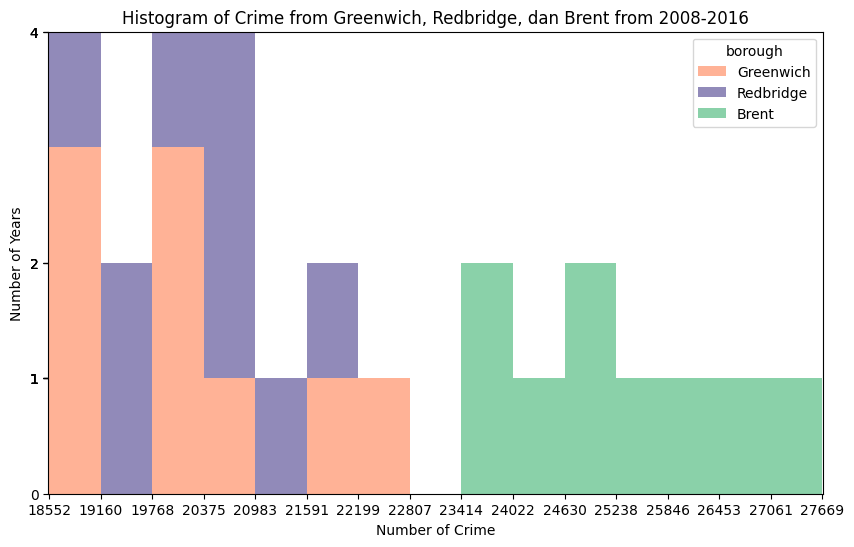

In [41]:
count, bin_edges = np.histogram(df_grb, 15)
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10  

df_grb.plot(kind='hist',
          figsize=(10,6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          yticks=count,  
          stacked=True,
          xlim=(xmin,xmax),  
          color=['coral', 'darkslateblue', 'mediumseagreen']
          )

plt.title('Histogram of Crime from Greenwich, Redbridge, dan Brent from 2008-2016')
plt.xlabel('Number of Crime')
plt.ylabel('Number of Years')

plt.show()

### BarChart

In [42]:
df_drugs = major_crime.loc['Drugs', years]
df_drugs

2008    68804
2009    60549
2010    58674
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: Drugs, dtype: int64

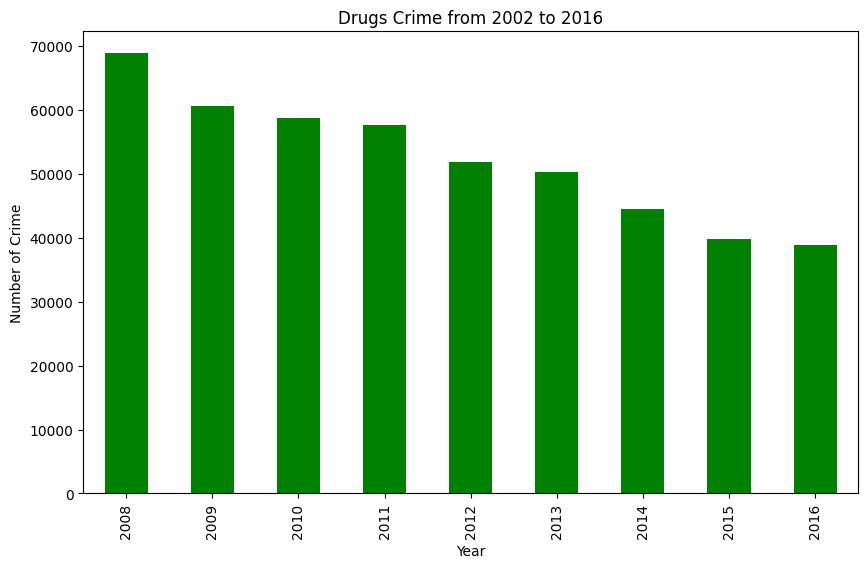

In [43]:
df_drugs.plot(kind='bar', figsize=(10,6), color='green')

plt.title('Drugs Crime from 2002 to 2016')
plt.ylabel('Number of Crime')
plt.xlabel('Year')

plt.show()

In [44]:
df_london = crime_borough['Total Crime in Borough']
df_london.head()

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: Total Crime in Borough, dtype: int64

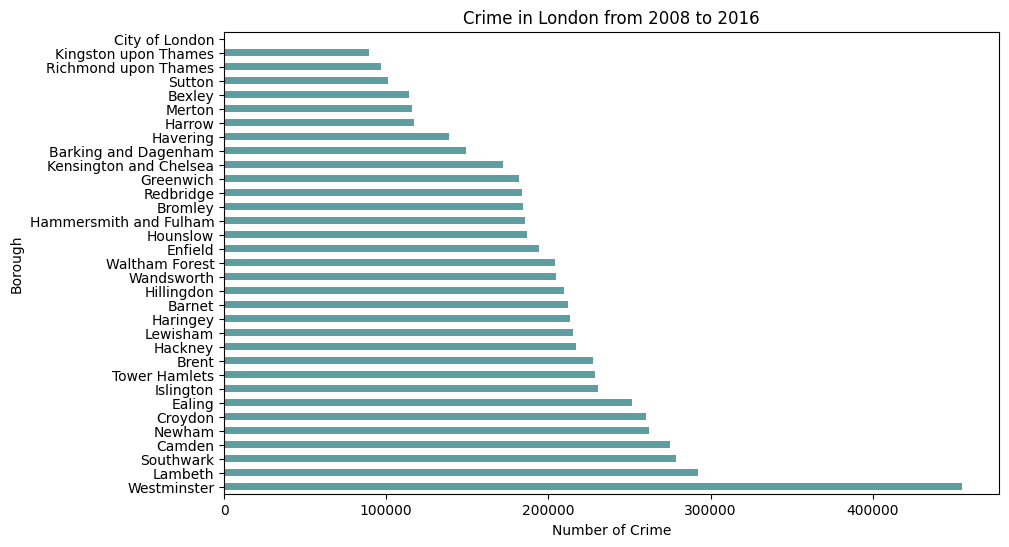

In [45]:
df_london.plot(kind='barh', figsize=(10,6), color='cadetblue')

plt.title('Crime in London from 2008 to 2016')
plt.ylabel('Borough')
plt.xlabel('Number of Crime')

plt.show()

In [46]:
top5 = major_crime['2008'].head(5)

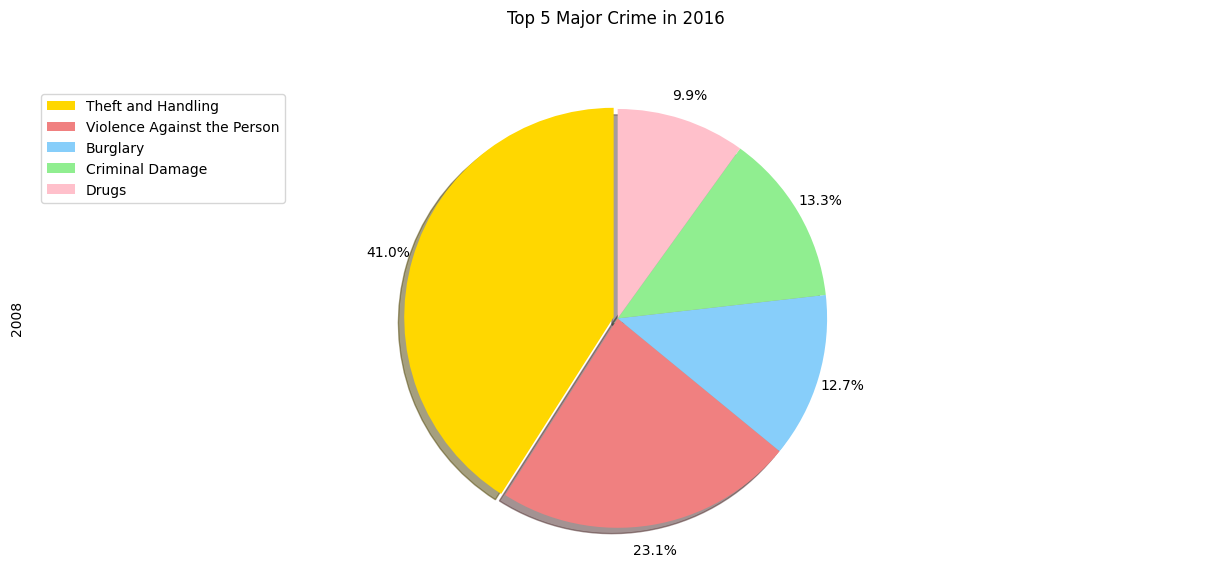

In [47]:
colors_list = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# jarak antar data pada pie chart
explode_list = [.02, 0, 0, 0, 0] 

top5.plot(kind='pie',
          figsize=(15, 6),
          autopct='%1.1f%%', 
          startangle=90,    
          shadow=True,       
          labels=None,         
          pctdistance=1.12,    
          colors=colors_list,  
          explode=explode_list 
         )

plt.title('Top 5 Major Crime in 2016', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=top5.index, loc='upper left') 

plt.show()

In [48]:
top7 = crime_borough['Total Crime in Borough'].head(7)
top7

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Croydon        260294
Ealing         251562
Name: Total Crime in Borough, dtype: int64

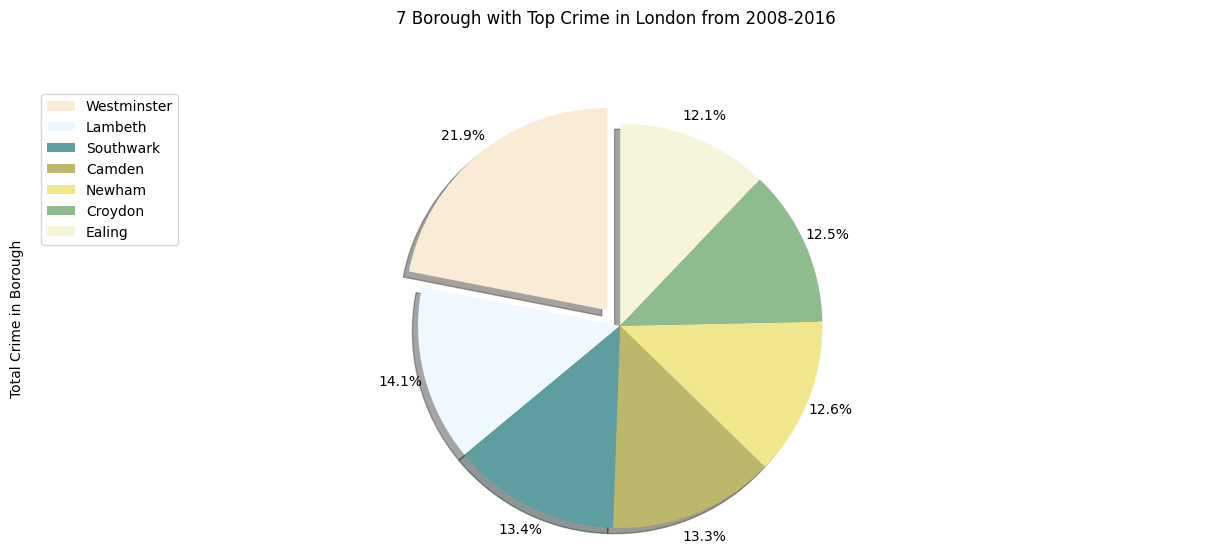

In [49]:
colors_list = ['antiquewhite', 'aliceblue', 'cadetblue', 'darkkhaki', 'khaki', 'darkseagreen', 'beige']
explode_list = [0.1, 0, 0, 0, 0, 0, 0]

top7.plot(kind='pie',
          figsize=(15, 6),
          autopct='%1.1f%%', 
          startangle=90,    
          shadow=True,       
          labels=None,         
          pctdistance=1.12,    
          colors=colors_list,  
          explode=explode_list 
         )

plt.title('7 Borough with Top Crime in London from 2008-2016', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=top7.index, loc='upper left') 

plt.show()

### BoxPlot 

In [50]:
df_burglary = major_crime.loc[['Burglary'], years].T
df_burglary.head()

major_category,Burglary
2008,88092
2009,90619
2010,86826
2011,93315
2012,93392


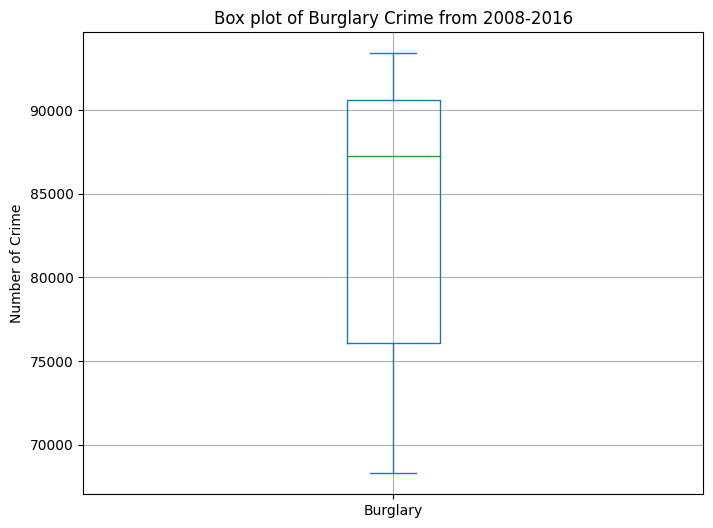

In [51]:
df_burglary.plot(kind='box', figsize=(8, 6), grid=True)

plt.title('Box plot of Burglary Crime from 2008-2016')
plt.ylabel('Number of Crime')

plt.show()

In [52]:
df_burglary.describe()

major_category,Burglary
count,9.000000
mean,83810.333333
std,9658.166674
min,68285.000000
25%,76053.000000
50%,87222.000000
75%,90619.000000
max,93392.000000


In [53]:
## perbandingan distribusi
df_ce = crime_borough.loc[(['Camden', 'Ealing'], tahun)].T
df_ce.head()

borough,Camden,Ealing
2008,32010,28947
2009,31612,28617
2010,31804,31360
2011,33956,29537
2012,31472,28832


In [54]:
df_ce.describe()

borough,Camden,Ealing
count,9.000000,9.000000
mean,30571.888889,27951.333333
std,2121.547633,2028.142192
min,27198.000000,24978.000000
25%,29183.000000,26247.000000
50%,31472.000000,28617.000000
75%,31804.000000,28947.000000
max,33956.000000,31360.000000


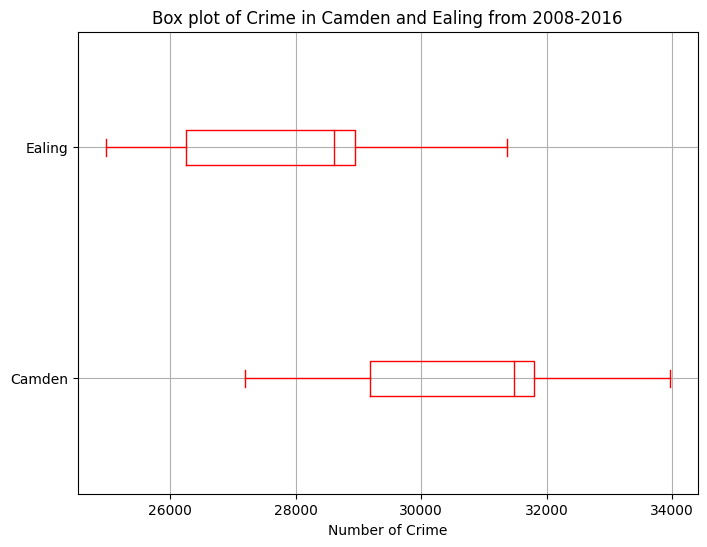

In [55]:
df_ce.plot(kind='box', figsize=(8, 6), grid=True, color='red', vert=False)

plt.title('Box plot of Crime in Camden and Ealing from 2008-2016')
plt.xlabel('Number of Crime')

plt.show()

### ScatterPlot

In [56]:
df_grb = crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun].T
# menjumlahkan total kasus dari ketiga wilayah dan dimasukkan ke df_total
df_total = pd.DataFrame(df_grb.sum(axis=1))
df_total.reset_index(inplace=True)
# merubah nama kolom menjadi year dan total
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total

,year,total
0,2008,66387
1,2009,65436
2,2010,64790
3,2011,68215
4,2012,67809
5,2013,62500
6,2014,63910
7,2015,64709
8,2016,68925


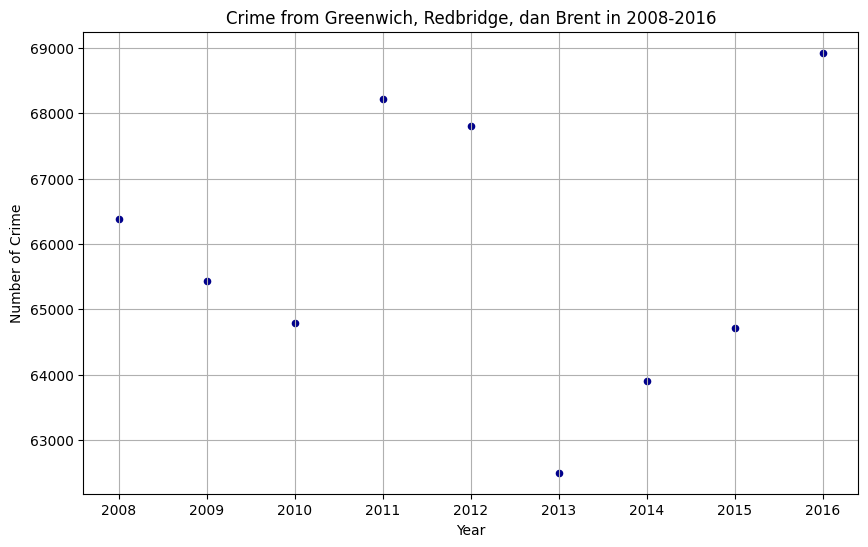

In [57]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue', grid=True)
plt.title('Crime from Greenwich, Redbridge, dan Brent in 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.show()

### WORD CLOUDS 

In [58]:
stopwords = set(STOPWORDS)

In [59]:
minor_crime = ''.join(df.minor_category)

In [60]:
crime_wc = WordCloud(background_color='aliceblue',
                     max_words=100, 
                     stopwords=stopwords
                    )

crime_wc.generate(minor_crime)

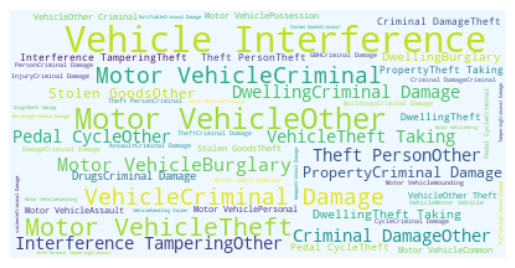

In [61]:
plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
anjing = np.array(Image.open('D:/Kuliah/Semester 7/Hacktiv8/Jupyter/Assigment python 1/anjing.jpg'))

In [63]:
anjing

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

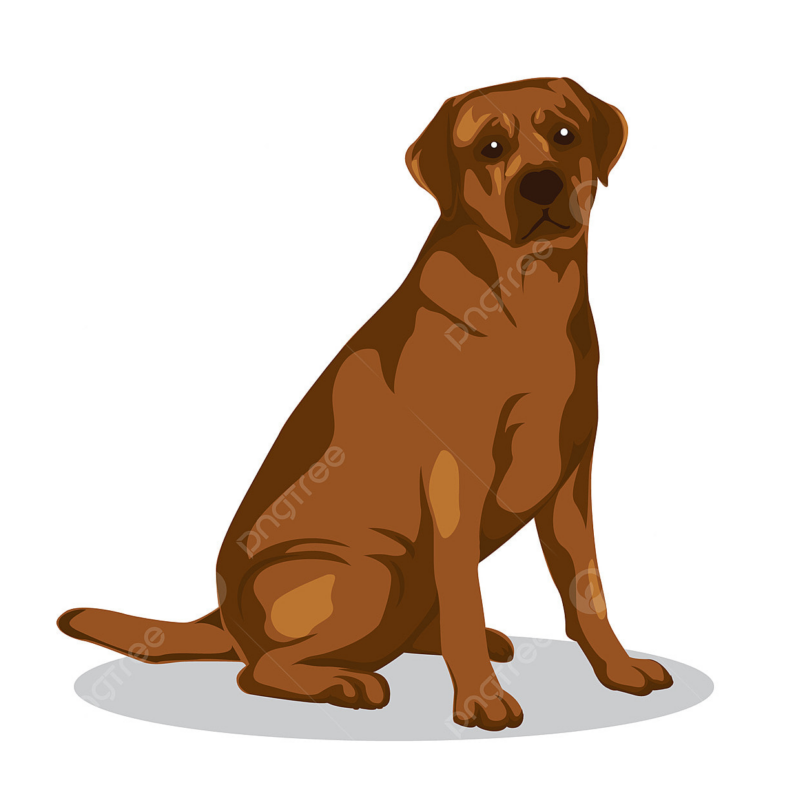

In [64]:
fig=plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(anjing,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

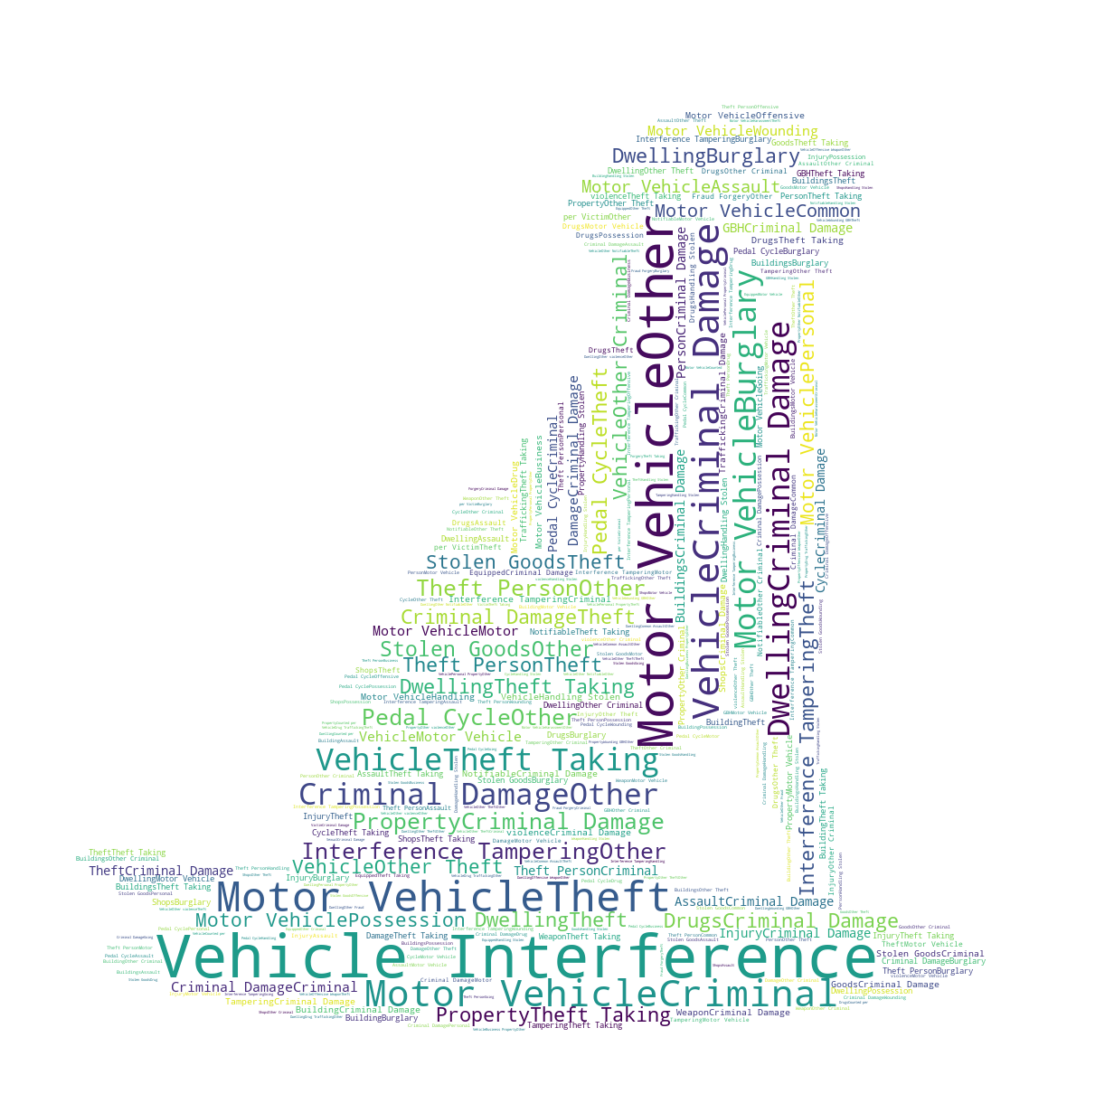

In [65]:
crime_wc = WordCloud(background_color='white', max_words=300,
                    mask=anjing, stopwords=stopwords)

crime_wc.generate(minor_crime)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(crime_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### Folium Maps

In [66]:
lat = 51.509865
long = -0.118092

In [67]:
london_map = folium.Map(location=[lat, long], zoom_start=12)

london_map

In [68]:
london_map = folium.Map(location=[lat, long], zoom_start=12, tiles='Stamen Toner')

london_map

In [69]:
london_map = folium.Map(location=[lat, long], zoom_start=12, tiles='Stamen Terrain')

london_map

In [70]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12, tiles='Stamen Terrain')

london_map